In [23]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from mislabelling import symmetric_noise, pair_noise
from InitialTesting import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from InitialAdjustedRandomForest import train

np.random.default_rng(40)

Generator(PCG64) at 0x12E545460

In [2]:
data = load_wine()
print(data.data.shape)

RESOLUTION = 20
TRIALS = 35
N_ESTIMATORS = 20
TEST_SIZE = 0.25
SEED = 0

accuracies_all = []
relabelling_f1_all = []
relabelling_acc_all = []

(178, 13)


In [3]:
accuracies, relabelling_f1, relabelling_acc, noise_level = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=True,
                                                                           bootstrap=True,
                                                                           seed=SEED)

accuracies_all.append(accuracies[1])
accuracies_all.append(accuracies[0])
relabelling_f1_all.append(relabelling_f1[0])
relabelling_acc_all.append(relabelling_acc[0])

In [ ]:
accuracies, relabelling_f1, relabelling_acc, noise_level = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=False,
                                                                           bootstrap=True,
                                                                           seed=SEED,
                                                                           methods = ('standard'))

accuracies_all.append(accuracies[0])

In [ ]:
accuracies, relabelling_f1, relabelling_acc, noise_level = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=False,
                                                                           bootstrap=False,
                                                                           seed=SEED,
                                                                           methods = ('standard'))

accuracies_all.append(accuracies[0])

In [6]:
accuracies, relabelling_f1, relabelling_acc, noise_level = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=True,
                                                                           bootstrap=False,
                                                                           seed=SEED,
                                                                           methods = ('standard'))

accuracies_all.append(accuracies[0])
relabelling_f1_all.append(relabelling_f1[0])
relabelling_acc_all.append(relabelling_acc[0])

In [7]:
N_ESTIMATORS = 50

accuracies, relabelling_f1, relabelling_acc, noise_level = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=True,
                                                                           bootstrap=True,
                                                                           relabel_bunch=5,
                                                                           methods = ('standard'))

accuracies_all.append(accuracies[0])
relabelling_f1_all.append(relabelling_f1[0])
relabelling_acc_all.append(relabelling_acc[0])

accuracies, relabelling_f1, relabelling_acc, noise_level = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=True,
                                                                           bootstrap=True,
                                                                           methods = ('standard'))

accuracies_all.append(accuracies[0])
relabelling_f1_all.append(relabelling_f1[0])
relabelling_acc_all.append(relabelling_acc[0])

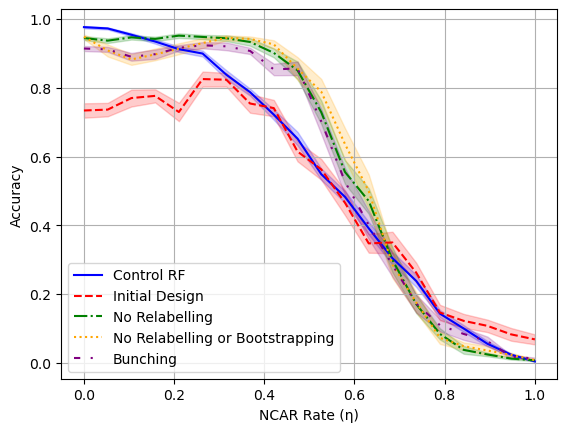

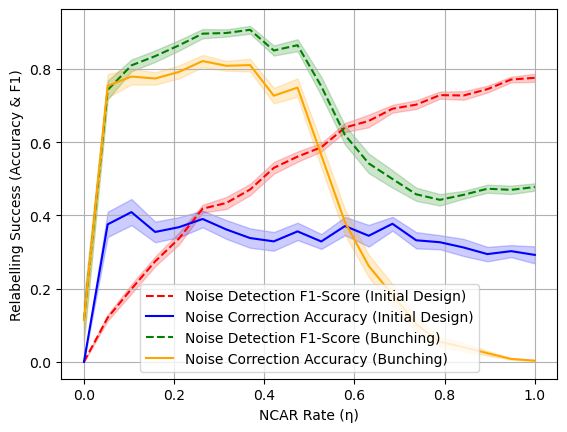

In [29]:
accuracies_mean, accuracies_se, relabelling_f1_success, relabelling_f1_se, relabelling_acc_success, relabelling_acc_se, x_axis = process_experiment_results(accuracies_all, relabelling_f1_all, relabelling_acc_all, RESOLUTION, TEST_SIZE, len(data.target))

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Control RF", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Initial Design", color='red', linestyle='--')
plot_with_error_band(x_axis, accuracies_mean[2], accuracies_se[2], label="No Relabelling", color='green', linestyle='-.')
plot_with_error_band(x_axis, accuracies_mean[3], accuracies_se[3], label="No Relabelling or Bootstrapping", color='orange', linestyle=':')
plot_with_error_band(x_axis, accuracies_mean[5], accuracies_se[5], label="Bunching", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))


plt.xlabel("NCAR Rate (η)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success[3], relabelling_f1_se[3], label="Noise Detection F1-Score (Initial Design)", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success[3], relabelling_acc_se[3], label="Noise Correction Accuracy (Initial Design)", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success[2], relabelling_f1_se[2], label="Noise Detection F1-Score (Bunching)", color='green', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success[2], relabelling_acc_se[2], label="Noise Correction Accuracy (Bunching)", color='orange')

plt.xlabel("NCAR Rate (η)")
plt.ylabel("Relabelling Success (Accuracy & F1)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
for i in range(1, 11):
    accuracies_all, relabelling_f1_all, relabelling_acc_all, noise_levels = run_relabelling_experiment(data,
                                                                            RandomForestClassifier,
                                                                            symmetric_noise,
                                                                            n_estimators=N_ESTIMATORS,
                                                                            trials=TRIALS,
                                                                            methods = 'standard',
                                                                            resolution=RESOLUTION,
                                                                            test_size=TEST_SIZE,
                                                                            relabelling=True,
                                                                            bootstrap=False,
                                                                            relabel_bunch=i)

    # Calculate mean and standard deviation
    f1_mean = relabelling_f1_all.mean()
    f1_std = relabelling_f1_all.std()

    acc_mean = relabelling_acc_all.mean()
    acc_std = relabelling_acc_all.std()

    print(f"Relabel Bunch = {i}")
    print(f"F1 Mean: {f1_mean:.4f}, Std: {f1_std:.4f}")
    print(f"Accuracy Mean: {acc_mean:.4f}, Std: {acc_std:.4f}\n")

Relabel Bunch = 1
F1 Mean: 0.2579, Std: 0.3068
Accuracy Mean: 0.1623, Std: 0.1841

Relabel Bunch = 2
F1 Mean: 0.2673, Std: 0.3103
Accuracy Mean: 0.1776, Std: 0.2323

Relabel Bunch = 3
F1 Mean: 0.2899, Std: 0.3314
Accuracy Mean: 0.1985, Std: 0.2952

Relabel Bunch = 4
F1 Mean: 0.3107, Std: 0.3540
Accuracy Mean: 0.2102, Std: 0.3208

Relabel Bunch = 5
F1 Mean: 0.3284, Std: 0.3658
Accuracy Mean: 0.2141, Std: 0.3298

Relabel Bunch = 6
F1 Mean: 0.3219, Std: 0.3560
Accuracy Mean: 0.1989, Std: 0.3107

Relabel Bunch = 7
F1 Mean: 0.2895, Std: 0.3356
Accuracy Mean: 0.1743, Std: 0.2897

Relabel Bunch = 8
F1 Mean: 0.2354, Std: 0.3049
Accuracy Mean: 0.1375, Std: 0.2598

Relabel Bunch = 9
F1 Mean: 0.1560, Std: 0.2553
Accuracy Mean: 0.0910, Std: 0.2155

Relabel Bunch = 10
F1 Mean: 0.1555, Std: 0.2546
Accuracy Mean: 0.0910, Std: 0.2146



In [ ]:
n_samples = len(data.data)

dt = DecisionTreeClassifier(max_depth=3, random_state=SEED)
np.random.seed(SEED)

for _ in range(50):
    clean_observed_certainty = [[], [], []]
    noisy_observed_certainty = [[], [], []]
    noisy_true_certainty = [[], [], []]

    indices = np.random.choice(n_samples, size=n_samples, replace=True)

    y_train = np.copy(data.target)
    y_mislabelled = symmetric_noise(y_train, 0.4)
    mislabel_mask = y_mislabelled != data.target

    X_boot = data.data[indices]
    y_boot = y_mislabelled[indices]

    dt.fit(X_boot, y_boot)

    for i in range(n_samples):
        if mislabel_mask[i]:
            noisy_observed_certainty[i in indices].append(dt.predict_proba([data.data[i]])[0][y_mislabelled[i]])
            noisy_true_certainty[i in indices].append(dt.predict_proba([data.data[i]])[0][data.target[i]])
        else:
            clean_observed_certainty[i in indices].append(dt.predict_proba([data.data[i]])[0][data.target[i]])

for _ in range(50):
    dt.fit(data.data, data.target)

    for i in range(n_samples):
        if mislabel_mask[i]:
            noisy_observed_certainty[2].append(dt.predict_proba([data.data[i]])[0][data.target[i]])
            noisy_true_certainty[2].append(dt.predict_proba([data.data[i]])[0][y_mislabelled[i]])
        else:
            clean_observed_certainty[2].append(dt.predict_proba([data.data[i]])[0][data.target[i]])

print("Included")
print(f"Noisy Observed Label Certainty: {np.mean(noisy_observed_certainty[1]):.4f}; std = {np.std(noisy_observed_certainty[1]):.4f}")
print(f"Noisy True Label Certainty: {np.mean(noisy_true_certainty[1]):.4f}; std = {np.std(noisy_true_certainty[1]):.4f}")
print(f"Clean Label Certainty: {np.mean(clean_observed_certainty[1]):.4f}; std = {np.std(clean_observed_certainty[1]):.4f}")

print("\nExcluded")
print(f"Noisy Observed Label Certainty: {np.mean(noisy_observed_certainty[0]):.4f}; std = {np.std(noisy_observed_certainty[0]):.4f}")
print(f"Noisy True Label Certainty: {np.mean(noisy_true_certainty[0]):.4f}; std = {np.std(noisy_true_certainty[0]):.4f}")
print(f"Clean Label Certainty: {np.mean(clean_observed_certainty[0]):.4f}; std = {np.std(clean_observed_certainty[0]):.4f}")

print("\nNon-Bootstrapped")
print(f"Noisy Observed Label Certainty: {np.mean(noisy_observed_certainty[2]):.4f}; std = {np.std(noisy_observed_certainty[2]):.4f}")
print(f"Noisy True Label Certainty: {np.mean(noisy_true_certainty[2]):.4f}; std = {np.std(noisy_true_certainty[2]):.4f}")
print(f"Clean Label Certainty: {np.mean(clean_observed_certainty[2]):.4f}; std = {np.std(clean_observed_certainty[2]):.4f}")

Included
Noisy Observed Label Certainty: 0.3952; std = 0.2262
Noisy True Label Certainty: 0.3337; std = 0.1740
Clean Label Certainty: 0.5547; std = 0.2890

Excluded
Noisy Observed Label Certainty: 0.3116; std = 0.2540
Noisy True Label Certainty: 0.4292; std = 0.2997
Clean Label Certainty: 0.4475; std = 0.2795

Non-Bootstrapped
Noisy Observed Label Certainty: 0.9662; std = 0.1153
Noisy True Label Certainty: 0.0110; std = 0.0229
Clean Label Certainty: 0.9524; std = 0.1522
